# Test 6.0

## Theory Question 

Que 1-> How does ResNet solve the problem of network degradation?



The REsNet is a Residual Neural Network which works to address the problem faced by the prior working Neural Networks of the Netwrok Degradation. The Network degradation problem arises when the model starts to decompose in itslef as over the iterative training process, the models weight updation and gradient score start to over shoot or undershoot resulting in a invaid and decomposed training as the loss starts to rise. This could occur due to multiple reasons, but as addressed by the REsNet, it was the adding of more and superficial layers to the model. REsNet performed a 'layer bypass' or as can be observed in the TensorFlow Functions a Dropout functio  which allowed the network to randomly skip a set number of parameters which might have caused a large scale degradation of the model. Thus working, REsNet allowed for a longer training period without encountering the Network Degradation problem

Que 2-> What does "freezing the layer" mean in the context of transfer learning?

In transfer learning, "freezing the layer" refers to a technique where we prevent the weights and biases of a specific layer (or group of layers) in a pre-trained model from being updated during the training process. This is done in order to ensure that the model does not go in a state of overfitting and allows us to control the data flow and Training process

## Practicle Question

- Load the chess dataset
    

In [28]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

2024-06-15 06:35:51.788008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 06:35:51.788155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 06:35:51.974866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loaded images shape: (651, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (651,) /n Images with Folder name


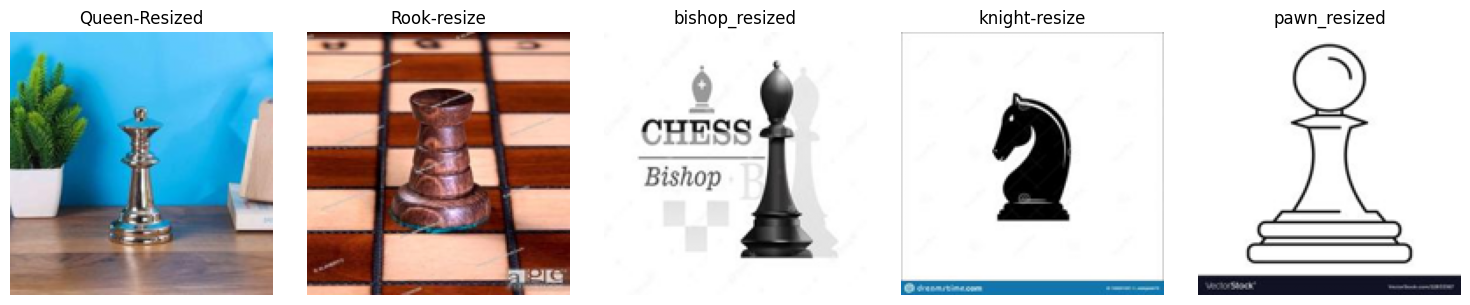

In [173]:
from PIL import Image
import numpy as np

# Set up the directory path where your dataset is located
dataset_directory = '/kaggle/input/chess-pieces-detection-images-dataset/'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task: 
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task: 
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters only on each layer)
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task: 
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task: 
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task: 
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [205]:
dataset_directory

'/kaggle/input/chess-pieces-detection-images-dataset/'

In [209]:
source_path = dataset_directory

source_path_queen = os.path.join(source_path, 'Queen-Resized/')
source_path_rook = os.path.join(source_path, 'Rook-resize/')
source_path_bishop = os.path.join(source_path, 'bishop_resized/')
source_path_knight = os.path.join(source_path, 'knight-resize/')
source_path_pawn = os.path.join(source_path, 'pawn_resized/')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_queen))} images of queen.")
print(f"There are {len(os.listdir(source_path_rook))} images of rook.")
print(f"There are {len(os.listdir(source_path_bishop))} images of bishop.")
print(f"There are {len(os.listdir(source_path_knight))} images of knight.")
print(f"There are {len(os.listdir(source_path_pawn))} images of pawn.")


There are 115 images of queen.
There are 139 images of rook.
There are 141 images of bishop.
There are 174 images of knight.
There are 82 images of pawn.


In [210]:
source_path_rook

'/kaggle/input/chess-pieces-detection-images-dataset/Rook-resize/'

In [211]:
root_dir = '/tmp/chess-classif'

if os.path.exists(root_dir):
    shutil.rmtree(root_dir)
    print(root_dir)

/tmp/chess-classif


In [212]:
def create_train_test_dirs(root_path):
    path = os.path.join(root_dir, "training")
    os.makedirs(path)
    path_1 = os.path.join(path, "queen")
    os.makedirs(path_1)
    path_2 = os.path.join(path, "rook")
    os.makedirs(path_2)
    path_3 = os.path.join(path, "bishop")
    os.makedirs(path_3)
    path_4 = os.path.join(path, "knight")
    os.makedirs(path_4)
    path_5 = os.path.join(path, "pawn")
    os.makedirs(path_5)
    
    path = os.path.join(root_dir, "testing")
    os.makedirs(path)
    path_1t = os.path.join(path, "queen")
    os.makedirs(path_1t)
    path_2t = os.path.join(path, "rook")
    os.makedirs(path_2t)
    path_3t = os.path.join(path, "bishop")
    os.makedirs(path_3t)
    path_4t = os.path.join(path, "knight")
    os.makedirs(path_4t)
    path_5t = os.path.join(path, "pawn")
    os.makedirs(path_5t)

 
    pass

In [213]:
try:
    create_train_test_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [214]:

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/chess-classif/testing
/tmp/chess-classif/training
/tmp/chess-classif/testing/queen
/tmp/chess-classif/testing/bishop
/tmp/chess-classif/testing/pawn
/tmp/chess-classif/testing/knight
/tmp/chess-classif/testing/rook
/tmp/chess-classif/training/queen
/tmp/chess-classif/training/bishop
/tmp/chess-classif/training/pawn
/tmp/chess-classif/training/knight
/tmp/chess-classif/training/rook


In [215]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
  
  for filename in training_set:
    src_file = SOURCE + filename
    dest_file = TRAINING + filename
    copyfile(src_file, dest_file)
    
  for filename in testing_set:
    src_file = SOURCE + filename
    dest_file = TESTING + filename
    copyfile(src_file, dest_file)
  pass


In [216]:
import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename  # Keep the original path construction
    try:
      if os.path.getsize(file) > 0:
        files.append(filename)
      else:
        print(f"{filename} is zero length, so ignoring.")
    except FileNotFoundError:
      print(f"Error: File '{file}' not found. Skipping.")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    src_file = SOURCE + filename
    dest_file = TRAINING + filename
    copyfile(src_file, dest_file)

  for filename in testing_set:
    src_file = SOURCE + filename
    dest_file = TESTING + filename
    copyfile(src_file, dest_file)




In [217]:
TRAINING_DIR = "/tmp/chess-classif/training"
TESTING_DIR = "/tmp/chess-classif/testing"

TRAINING_QUEEN_DIR = os.path.join(TRAINING_DIR, "queen/")
TESTING_QUEEN_DIR = os.path.join(TESTING_DIR, "queen/")

TRAINING_ROOK_DIR = os.path.join(TRAINING_DIR, "rook/")
TESTING_ROOK_DIR = os.path.join(TESTING_DIR, "rook/")

TRAINING_BISHOP_DIR = os.path.join(TRAINING_DIR, "bishop/")
TESTING_BISHOP_DIR = os.path.join(TESTING_DIR, "bishop/")

TRAINING_KNIGHT_DIR = os.path.join(TRAINING_DIR, "knight/")
TESTING_KNIGHT_DIR = os.path.join(TESTING_DIR, "knight/")

TRAINING_PAWN_DIR = os.path.join(TRAINING_DIR, "pawn/")
TESTING_PAWN_DIR = os.path.join(TESTING_DIR, "pawn/")

In [218]:
TRAINING_BISHOP_DIR
TESTING_QUEEN_DIR

'/tmp/chess-classif/testing/queen/'

In [219]:
if len(os.listdir(TESTING_QUEEN_DIR)) > 0: #1
  for file in os.scandir(TESTING_QUEEN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_QUEEN_DIR)) > 0:
  for file in os.scandir(TRAINING_QUEEN_DIR):
    os.remove(file.path)
    
if len(os.listdir(rook_test)) > 0: #2
  for file in os.scandir(rook_test):
    os.remove(file.path)
if len(os.listdir(rook_train)) > 0:
  for file in os.scandir(rook_train):
    os.remove(file.path)
    
if len(os.listdir(knight_test)) > 0: #3
  for file in os.scandir(knight_test):
    os.remove(file.path)
if len(os.listdir(knight_train)) > 0:
  for file in os.scandir(knight_train):
    os.remove(file.path)
    
if len(os.listdir(bishop_test)) > 0: #4
  for file in os.scandir(bishop_test):
    os.remove(file.path)
if len(os.listdir(bishop_train)) > 0:
  for file in os.scandir(bishop_train):
    os.remove(file.path)
    
if len(os.listdir(pawn_test)) > 0: #5
  for file in os.scandir(pawn_test):
    os.remove(file.path)
if len(os.listdir(pawn_train)) > 0:
  for file in os.scandir(pawn_train):
    print(file.path)
    os.remove(file.path)

In [221]:
split_size = 0.7

split_data(source_path_queen, TRAINING_QUEEN_DIR, TESTING_QUEEN_DIR, split_size)
split_data(source_path_rook, TRAINING_ROOK_DIR, TESTING_ROOK_DIR, split_size)
split_data(source_path_bishop, TRAINING_BISHOP_DIR, TESTING_BISHOP_DIR, split_size)
split_data(source_path_knight, TRAINING_KNIGHT_DIR, TESTING_KNIGHT_DIR, split_size)
split_data(source_path_pawn, TRAINING_PAWN_DIR, TESTING_PAWN_DIR, split_size)


In [222]:
print(len(os.listdir(TESTING_QUEEN_DIR)))
print(len(os.listdir(TESTING_ROOK_DIR)))
print(len(os.listdir(TESTING_KNIGHT_DIR)))
print(len(os.listdir(TESTING_BISHOP_DIR)))
print(len(os.listdir(TESTING_PAWN_DIR)))

60
42
53
43
25


In [223]:
print(len(os.listdir(TRAINING_QUEEN_DIR)))

105


In [231]:


def image_gen(train_data_dir, valid_data_dir):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    horizontal_flip = True,
                    )
    train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='training'
                )
    val_datagen = ImageDataGenerator(rescale = 1./255.)

    validation_generator = val_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical'
    )
    return validation_generator, train_generator

In [232]:
train_generator, validation_generator = image_gen(TRAINING_DIR, TESTING_DIR)


Found 478 images belonging to 5 classes.
Found 223 images belonging to 5 classes.


In [264]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, input_shape = (224,224,3), activation = 'relu', kernel_size = (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, activation = 'relu', kernel_size = (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, activation = 'relu', kernel_size = (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax'),

])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [265]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [266]:
ALEX_20 = model.fit(train_generator, epochs = 20, validation_data = validation_generator, verbose = 1)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.2140 - loss: 2.2865 - val_accuracy: 0.2071 - val_loss: 1.5945
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.2632 - loss: 1.6029 - val_accuracy: 0.2490 - val_loss: 1.5846
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.2770 - loss: 1.5679 - val_accuracy: 0.2510 - val_loss: 1.5844
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.2299 - loss: 1.5816 - val_accuracy: 0.2406 - val_loss: 1.5871
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.2652 - loss: 1.5886 - val_accuracy: 0.2552 - val_loss: 1.5925
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2950 - loss: 1.5058 - val_accuracy: 0.2469 - val_loss: 1.5906
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3471 - loss: 1.4539 - val_accuracy: 0.2573 - val_loss: 1.6189
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3526 - loss: 1.4038 - val_accuracy: 0.2699 - val_loss: 1.6182
Epoch 9/

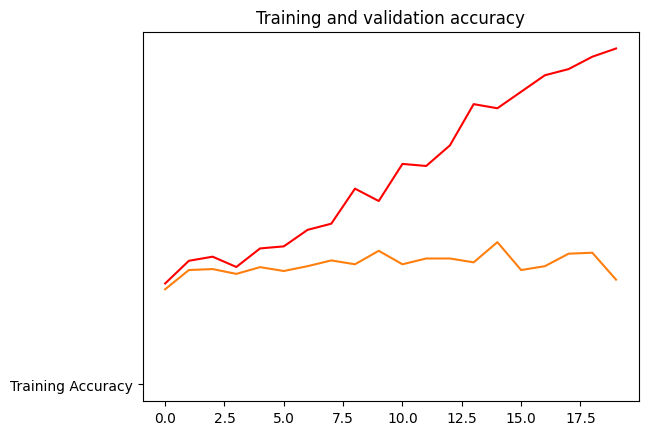

In [267]:
acc=ALEX_20.history['accuracy']
loss=ALEX_20.history['loss']
val_acc = ALEX_20.history['val_accuracy']
epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.show()
print("")

In [268]:
ALEX_30 = model.fit(train_generator, epochs = 10,validation_data = validation_generator,  verbose = 1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7817 - loss: 0.6622 - val_accuracy: 0.2782 - val_loss: 2.8308
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7486 - loss: 0.6313 - val_accuracy: 0.2657 - val_loss: 2.4120
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8254 - loss: 0.5829 - val_accuracy: 0.2950 - val_loss: 3.0494
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8399 - loss: 0.4695 - val_accuracy: 0.2343 - val_loss: 2.7271
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8465 - loss: 0.5043 - val_accuracy: 0.2552 - val_loss: 2.8137
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8353 - loss: 0.4659 - val_accuracy: 0.2573 - val_loss: 3.2910
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7809 - loss: 0.6188 - val_accuracy: 0.2929 - val_loss: 3.4050
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8033 - loss: 0.4893 - val_accuracy: 0.2741 - val_loss: 2.9345
Epoch 9/

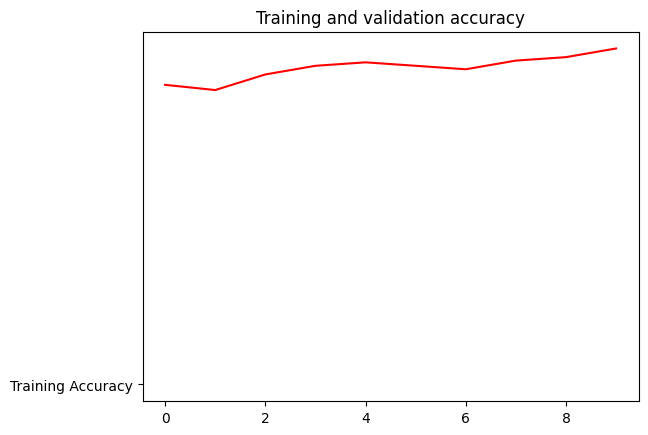

In [269]:
acc=ALEX_30.history['accuracy']
loss=ALEX_30.history['loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

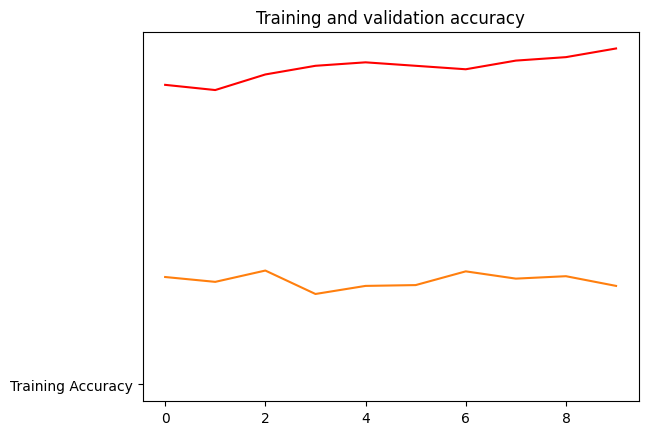

In [272]:
acc=ALEX_30.history['accuracy']
loss=ALEX_30.history['loss']
val_acc = ALEX_30.history['val_accuracy']
epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.show()
print("")

In [8]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20